In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [30]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("madhukk23/my-splits-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/my-splits-dataset


In [31]:
import os

def print_folder_structure_with_counts(root_dir):
    for dirpath, dirnames, filenames in os.walk(root_dir):
        level = dirpath.replace(root_dir, '').count(os.sep)
        indent = ' ' * 4 * level
        print(f"{indent}{os.path.basename(dirpath)}/ ({len(filenames)} files)")

# Path to the dataset
dataset_path = "/kaggle/input/my-splits-dataset"
print_folder_structure_with_counts(dataset_path)


my-splits-dataset/ (0 files)
    split_70_30/ (0 files)
        test/ (0 files)
            Alternaria_Leaf_Spot/ (60 files)
            club root/ (60 files)
            Downy Mildew/ (60 files)
            Cabbage aphid colony/ (60 files)
            ring spot/ (60 files)
            Black Rot/ (60 files)
            Bacterial spot rot/ (60 files)
            No disease/ (60 files)
        train/ (0 files)
            Alternaria_Leaf_Spot/ (140 files)
            club root/ (140 files)
            Downy Mildew/ (140 files)
            Cabbage aphid colony/ (140 files)
            ring spot/ (140 files)
            Black Rot/ (140 files)
            Bacterial spot rot/ (140 files)
            No disease/ (140 files)
    split_50_50/ (0 files)
        test/ (0 files)
            Alternaria_Leaf_Spot/ (100 files)
            club root/ (100 files)
            Downy Mildew/ (100 files)
            Cabbage aphid colony/ (100 files)
            ring spot/ (100 files)
            Black Rot/

In [32]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras import layers, models
import os

# Define paths
base_dir = "/kaggle/input/my-splits-dataset/split_80_20"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "test")

# Parameters
IMAGE_SIZE = (299, 299)  # Required for InceptionV3
BATCH_SIZE = 32
NUM_CLASSES = 8

# Data Generators
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Load InceptionV3 base model without top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=IMAGE_SIZE + (3,))
base_model.trainable = False  # Freeze base model

# Add custom top layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


Found 1280 images belonging to 8 classes.
Found 320 images belonging to 8 classes.
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.4492 - loss: 1.5242 - val_accuracy: 0.8313 - val_loss: 0.5662
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.7843 - loss: 0.6023 - val_accuracy: 0.8687 - val_loss: 0.3774
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.8778 - loss: 0.3865 - val_accuracy: 0.9125 - val_loss: 0.2818
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.8942 - loss: 0.2973 - val_accuracy: 0.9469 - val_loss: 0.2027
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.9142 - loss: 0.2704 - val_accuracy: 0.9531 - val_loss: 0.1957
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9303 - loss: 0.2225 - val_accuracy: 0.9500 - val_loss: 0.1805
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.9301 - loss: 0.2180 - val_accuracy: 0.9469 - val_loss: 0.1867
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━

In [33]:
# Evaluate the model on the validation (test) set
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"\n✅ Final Validation Accuracy: {val_accuracy * 100:.2f}%")


10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.9567 - loss: 0.1369

✅ Final Validation Accuracy: 96.56%


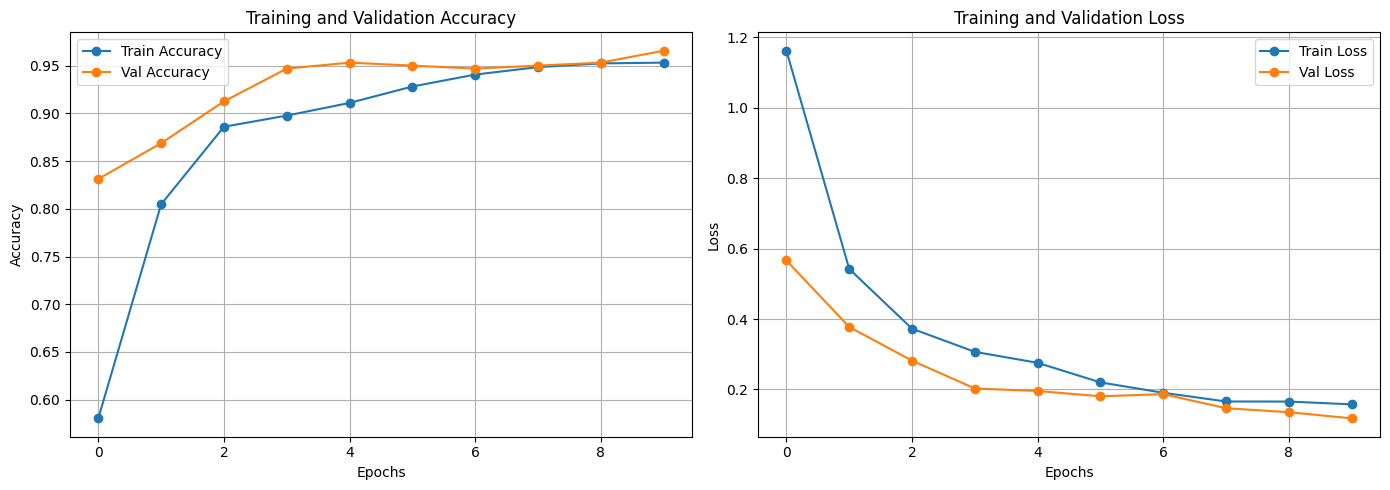

In [34]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Val Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Val Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [35]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Use same preprocessing as training
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
    val_dir,  # path to split_80_20/test
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # IMPORTANT for predictions to match labels
)


Found 320 images belonging to 8 classes.


In [36]:
# Evaluate performance
loss, accuracy = model.evaluate(test_generator)
print(f"\n✅ Test Accuracy: {accuracy * 100:.2f}%")


10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.9648 - loss: 0.1080

✅ Test Accuracy: 96.56%


10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step


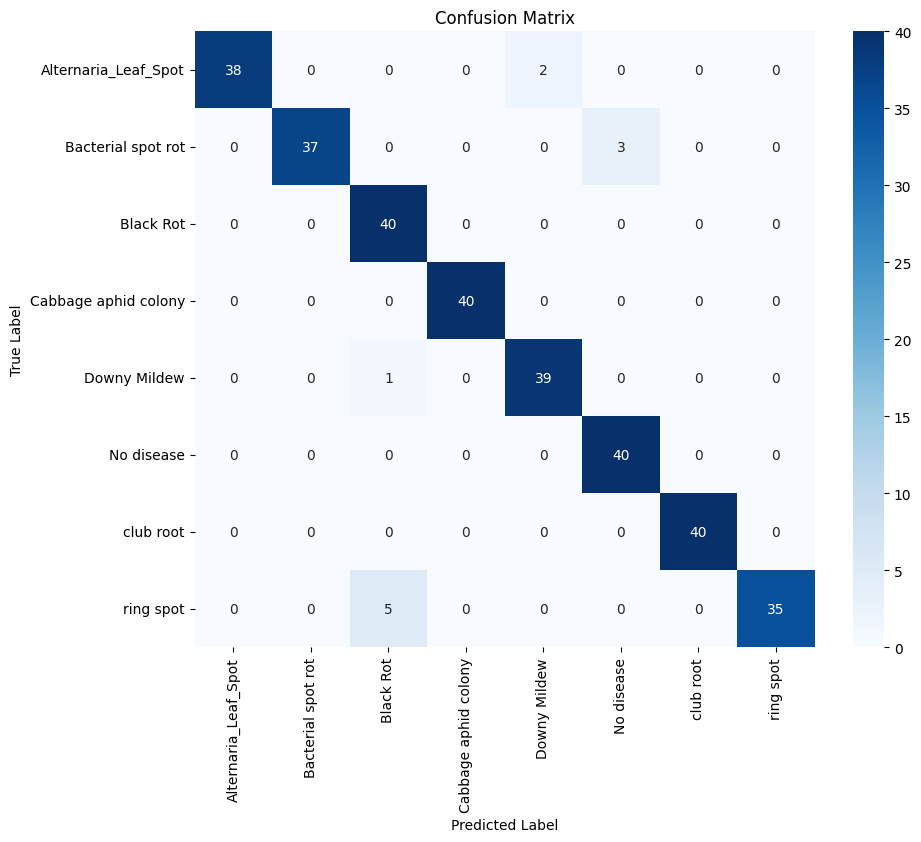


🧾 Classification Report:
                      precision    recall  f1-score   support

Alternaria_Leaf_Spot       1.00      0.95      0.97        40
  Bacterial spot rot       1.00      0.93      0.96        40
           Black Rot       0.87      1.00      0.93        40
Cabbage aphid colony       1.00      1.00      1.00        40
        Downy Mildew       0.95      0.97      0.96        40
          No disease       0.93      1.00      0.96        40
           club root       1.00      1.00      1.00        40
           ring spot       1.00      0.88      0.93        40

            accuracy                           0.97       320
           macro avg       0.97      0.97      0.97       320
        weighted avg       0.97      0.97      0.97       320



In [37]:
+

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict class probabilities
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\n🧾 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


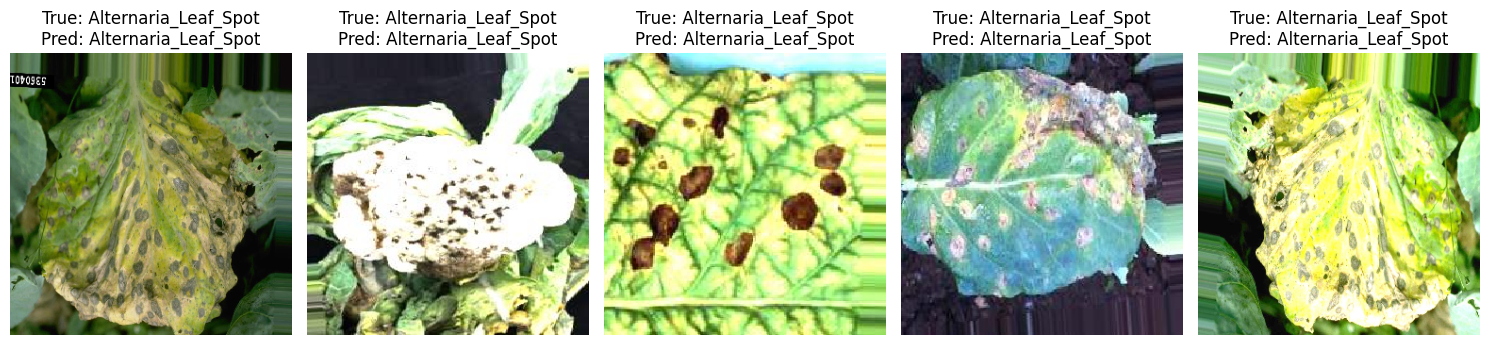

In [38]:
import matplotlib.pyplot as plt

# Load a full batch of data
x_batch, y_true_batch = next(test_generator)
y_pred_batch = model.predict(x_batch)
y_pred_labels = np.argmax(y_pred_batch, axis=1)
y_true_labels = np.argmax(y_true_batch, axis=1)

# Class labels
class_labels = list(test_generator.class_indices.keys())

# Show N predictions
N = 5
plt.figure(figsize=(15, 5))
for i in range(N):
    image = x_batch[i]
    true_label = class_labels[y_true_labels[i]]
    pred_label = class_labels[y_pred_labels[i]]
    
    plt.subplot(1, N, i + 1)
    plt.imshow((image + 1) / 2)  # De-normalize if needed
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input

# ✅ Class labels from test_generator
class_labels = list(test_generator.class_indices.keys())

# ✅ Function to test one image
def predict_single_image(img_path, model, class_labels):
    try:
        # Load and preprocess image
        img = image.load_img(img_path, target_size=(299, 299))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        # Predict
        preds = model.predict(img_array)
        predicted_index = np.argmax(preds)
        predicted_class = class_labels[predicted_index]
        confidence = preds[0][predicted_index]

        # Display
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Predicted: {predicted_class} ({confidence*100:.2f}%)")
        plt.show()

        print(f"✅ Predicted class: {predicted_class}")
        print(f"📊 Confidence: {confidence * 100:.2f}%")

    except Exception as e:
        print(f"❌ Error loading or processing image: {e}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


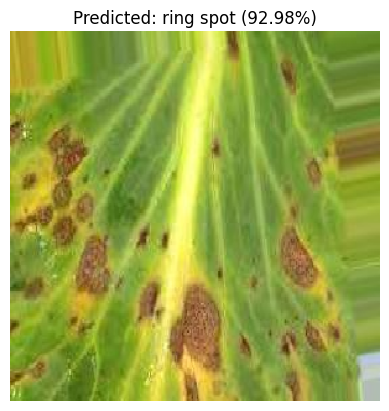

✅ Predicted class: ring spot
📊 Confidence: 92.98%


In [57]:
predict_single_image(
    "/kaggle/input/my-splits-dataset/split_80_20/test/ring spot/aug_22.jpg", 
    model, 
    class_labels
)



In [58]:
# === Final Summary Report for Your Model ===

# 1. Final Training Accuracy
final_train_acc = history.history['accuracy'][-1]
print(f"✅ Final Training Accuracy: {final_train_acc * 100:.2f}%")

# 2. Final Validation Accuracy (if available)
if 'val_accuracy' in history.history:
    final_val_acc = history.history['val_accuracy'][-1]
    print(f"✅ Final Validation Accuracy: {final_val_acc * 100:.2f}%")

# 3. Evaluate on Test Data
test_loss, test_acc = model.evaluate(test_generator, verbose=0)
print(f"✅ Final Test Accuracy: {test_acc * 100:.2f}%")

# 4. Model Name
print(f"🧠 Model Name: {model.name}")

# 5. Model Architecture Type
print(f"🏗️ Model Architecture Type: {type(model).__name__}")

# 6. (Optional) Print Base Model Info if using InceptionV3
for layer in model.layers:
    if 'InceptionV3' in layer.name:
        print(f"🔍 Base Architecture: InceptionV3 (layer: {layer.name})")
        break


✅ Final Training Accuracy: 95.31%
✅ Final Validation Accuracy: 96.56%
✅ Final Test Accuracy: 96.56%
🧠 Model Name: sequential_3
🏗️ Model Architecture Type: Sequential


In [59]:
# Save model in HDF5 format (compatible with most frameworks)
model.save('cauliflower_disease_model.h5')
